<a href="https://colab.research.google.com/github/Prosperibe12/ML-Algo/blob/master/ANN_Classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [62]:
#loading the MNIST Dataset
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()
print(f"Length of X_test is: {len(X_train)}, Lenght of y_train is {len(y_train)}, Lenght of X_test is {len(X_test)}, , Lenght of y_test is {len(y_test)}")

Length of X_test is: 60000, Lenght of y_train is 60000, Lenght of X_test is 10000, , Lenght of y_test is 10000


In [63]:
type(X_train), X_train.shape, X_train[0].shape

(numpy.ndarray, (60000, 28, 28), (28, 28))

In [64]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [65]:
y_train[0]

5

In [66]:
#printing the pixel values for an image
for row in X_train[0]:
  row = row.tolist()
  for i in row:
    print(str(i).ljust(3), end='')
  print()

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

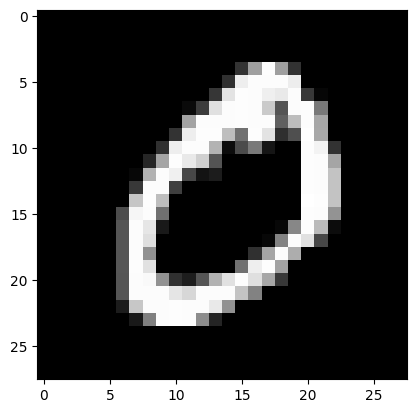

In [110]:
# Printing the image
plt.imshow(X_train[1], cmap='gray')

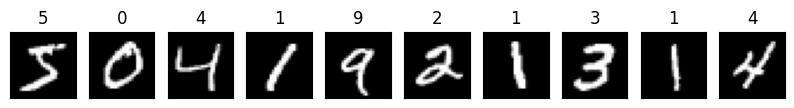

In [68]:
# Display some images
fig, axes = plt.subplots(ncols=10, sharex=False,sharey=True, figsize=(10, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [69]:
#Normalize data
X_train=X_train/255
X_test=X_test/255

In [70]:
#Initializing the  model
model=Sequential()

In [71]:
#creating input layer
input_layer=Flatten(input_shape=(28,28))

In [72]:
#Dense layer- layer 1
layer1=Dense(units=150,activation='relu')

In [73]:
#Dense layer- layer 2
layer2=Dense(units=100,activation='sigmoid')

In [74]:
#creating output layer
output_layer=Dense(units=10, activation='softmax')

In [75]:
#add the layers to model
model.add(input_layer)
model.add(layer1)
model.add(layer2)
model.add(output_layer)

In [76]:
#have a look at model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 150)               117750    
                                                                 
 dense_4 (Dense)             (None, 100)               15100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 133860 (522.89 KB)
Trainable params: 133860 (522.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model.weights[0]

<tf.Variable 'dense/kernel:0' shape=(784, 150) dtype=float32, numpy=
array([[ 0.05934726, -0.01889601, -0.06313707, ..., -0.07550286,
        -0.03601284, -0.03720127],
       [ 0.07681306,  0.00054599,  0.04992689, ...,  0.00325432,
         0.0284311 ,  0.06890434],
       [ 0.05309147, -0.07437412, -0.01463359, ...,  0.01033484,
        -0.0619318 , -0.0205866 ],
       ...,
       [-0.04854038, -0.01378178, -0.00498087, ...,  0.07500406,
         0.06107061,  0.06882788],
       [-0.01476967,  0.02125794, -0.04858057, ..., -0.04717866,
         0.04852487,  0.06884021],
       [-0.01188041,  0.03401799,  0.07428306, ...,  0.02366488,
         0.05503914, -0.07576443]], dtype=float32)>

In [77]:
#compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [78]:
#train model
training_history=model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),verbose=1)

Epoch 1/30
1875/1875 [==============================] - 9s 4ms/step - loss: 1.3142 - accuracy: 0.7085 - val_loss: 0.6761 - val_accuracy: 0.8475
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5448 - accuracy: 0.8676 - val_loss: 0.4323 - val_accuracy: 0.8920
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4047 - accuracy: 0.8929 - val_loss: 0.3542 - val_accuracy: 0.9053
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3471 - accuracy: 0.9038 - val_loss: 0.3146 - val_accuracy: 0.9130
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3142 - accuracy: 0.9106 - val_loss: 0.2901 - val_accuracy: 0.9190
Epoch 6/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2911 - accuracy: 0.9168 - val_loss: 0.2716 - val_accuracy: 0.9224
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2732 - accuracy: 0.9219 - val_loss: 0.2578 - val_accuracy:

In [79]:
result=pd.DataFrame(training_history.history)
result

,loss,accuracy,val_loss,val_accuracy
0,1.314154,0.708550,0.676146,0.8475
1,0.544762,0.867633,0.432304,0.8920
2,0.404745,0.892950,0.354211,0.9053
3,0.347147,0.903783,0.314578,0.9130
4,0.314226,0.910617,0.290139,0.9190
5,0.291134,0.916750,0.271579,0.9224
6,0.273172,0.921867,0.257829,0.9267
7,0.258185,0.925700,0.245098,0.9305
8,0.245354,0.928783,0.235026,0.9328
9,0.233577,0.932200,0.224940,0.9349


<Axes: >

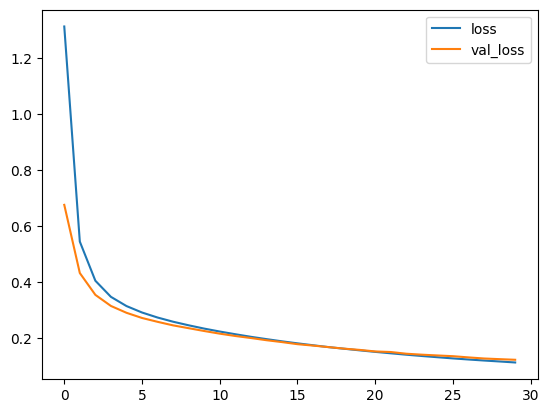

In [80]:
result[["loss","val_loss"]].plot()

<Axes: >

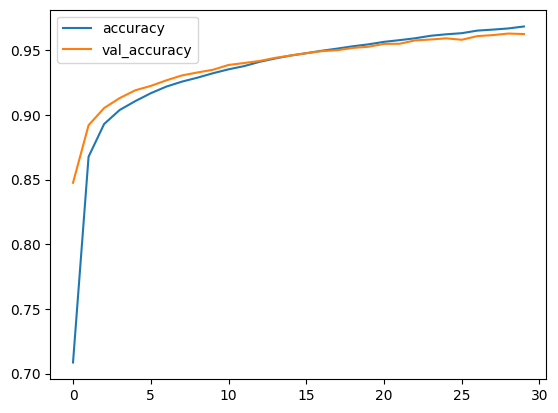

In [81]:
result[["accuracy","val_accuracy"]].plot()

In [82]:
#making predictions
y_pred=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [83]:
y_pred

array([[3.74896481e-05, 7.23329913e-06, 9.99554759e-04, ...,
        9.95650768e-01, 6.46387161e-06, 2.61256704e-04],
       [1.64723955e-03, 7.90167251e-04, 9.92629468e-01, ...,
        1.30296121e-06, 2.90307595e-04, 1.82591364e-07],
       [1.39985298e-06, 9.90555584e-01, 1.94359990e-03, ...,
        2.45484314e-03, 1.36353180e-03, 1.13537426e-04],
       ...,
       [1.16447133e-07, 3.37016672e-06, 1.46834020e-06, ...,
        1.21867211e-04, 3.40439583e-04, 1.31885346e-03],
       [3.17061786e-05, 4.82604191e-05, 2.36560868e-06, ...,
        3.69159409e-07, 3.22619011e-03, 8.68949792e-06],
       [1.25325023e-04, 1.71941531e-06, 2.89418589e-04, ...,
        1.13941815e-06, 1.50972774e-05, 1.54111387e-06]], dtype=float32)

In [90]:
y_pred[0]

array([3.7489648e-05, 7.2332991e-06, 9.9955476e-04, 2.9491773e-03,
       9.1047241e-07, 8.7050656e-05, 4.5401311e-08, 9.9565077e-01,
       6.4638716e-06, 2.6125670e-04], dtype=float32)

In [103]:
y_test[0]

7

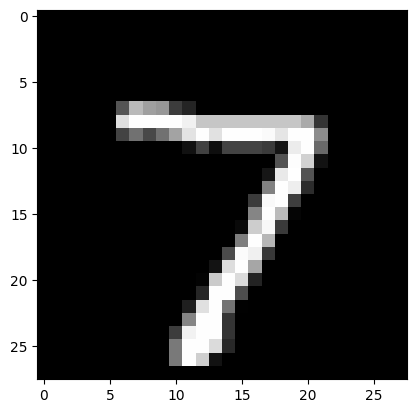

In [93]:
plt.imshow(X_test[0],cmap='gray')

In [94]:
np.argmax(y_pred[0])

7

In [95]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [96]:
y_pred_10=y_pred[0:10]

In [98]:
final_y_predicted=np.argmax(y_pred,axis=1)
final_y_predicted

array([7, 2, 1, ..., 4, 5, 6])

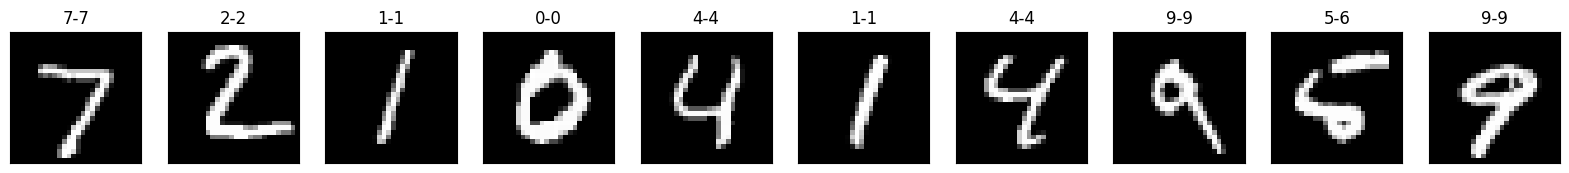

In [101]:
# Display some images
fig, axes = plt.subplots(ncols=10, sharex=False,
    sharey=True, figsize=(20, 10))
for i in range(10):
    axes[i].set_title(str(y_test[i])+"-"+str(np.argmax(y_pred[i])))
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=final_y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    1,    2,    0,    3,    2,    2,    1,    0],
       [   0, 1119,    1,    3,    0,    1,    4,    2,    5,    0],
       [   7,    2,  991,    9,    6,    0,    3,    9,    4,    1],
       [   1,    0,    7,  977,    0,    7,    0,    9,    6,    3],
       [   1,    0,    5,    0,  948,    0,    7,    2,    2,   17],
       [   6,    3,    0,   15,    2,  845,    9,    2,    6,    4],
       [   9,    3,    1,    0,    8,   12,  921,    1,    3,    0],
       [   0,    9,   11,    4,    1,    2,    0,  991,    0,   10],
       [   4,    2,    4,   16,    3,    7,    6,    5,  922,    5],
       [   8,    6,    1,   14,   21,    1,    1,   11,    2,  944]])>

Text(154.75, 0.5, 'Actual  digit')

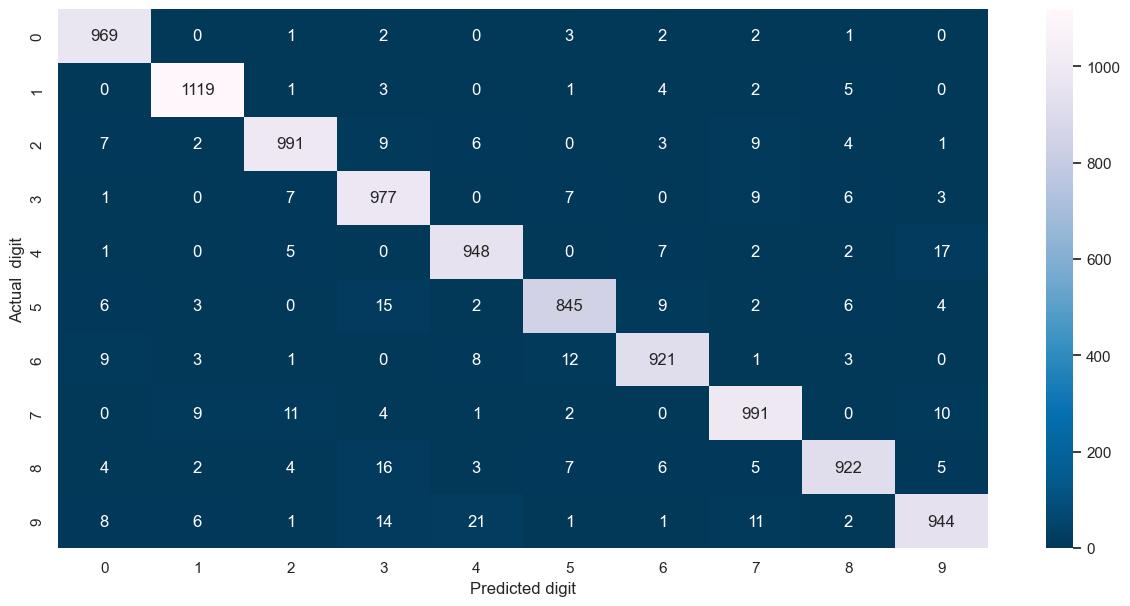

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,7)})
sns.heatmap(cm,annot=True,cmap='PuBu_r',fmt='g')
plt.xlabel("Predicted digit")
plt.ylabel("Actual  digit")